In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = ImageDataGenerator(rescale=1/255)
train_dir = '/content/drive/MyDrive/data/train/VNfood'

val = ImageDataGenerator(rescale=1/255)
val_dir = '/content/drive/MyDrive/data/val/VNfood'

In [5]:
train_generator = ImageDataGenerator(rotation_range = 10,
                                     zoom_range = 0.1,
                                     height_shift_range = 0.1,
                                     width_shift_range = 0.1,
                                     brightness_range = (0.9,1.1))

In [6]:
train_data = train_generator.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 128,
                                                    class_mode = 'categorical')

Found 105 images belonging to 10 classes.


In [7]:
val_data = val.flow_from_directory(val_dir,
                                        target_size = (150,150),
                                         batch_size = 128,
                                         class_mode = 'categorical')

Found 105 images belonging to 10 classes.


In [8]:
train_data.class_indices

{'Pho': 0,
 'banhbeo': 1,
 'banhcuon': 2,
 'banhmi': 3,
 'banhtrangtron': 4,
 'banhxeo': 5,
 'buncha': 6,
 'bunrieucua': 7,
 'comsuon': 8,
 'goicuon': 9}

In [9]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [11]:
history = model.fit(train_data,batch_size=128,epochs=50,verbose=1,validation_data=val_data)

Epoch 1/50
1/1 [==============================] - 48s 48s/step - loss: 6.9214 - accuracy: 0.0857 - val_loss: 2.3039 - val_accuracy: 0.0952
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 5.3186 - accuracy: 0.0857 - val_loss: 2.3037 - val_accuracy: 0.1048
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 4.2546 - accuracy: 0.1048 - val_loss: 2.3030 - val_accuracy: 0.0667
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 2.8353 - accuracy: 0.0952 - val_loss: 2.3027 - val_accuracy: 0.0762
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 2.4352 - accuracy: 0.1333 - val_loss: 2.3026 - val_accuracy: 0.1429
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 2.4078 - accuracy: 0.0857 - val_loss: 2.3025 - val_accuracy: 0.1238
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 2.3409 - accuracy: 0.1048 - val_loss: 2.3025 - val_accuracy: 0.1524
Epoch 8/50
1/1 [=======================

In [12]:
model.save('/content/drive/MyDrive/data/modelsave/final_VNfood.h5')

In [13]:
model = load_model('/content/drive/MyDrive/data/modelsave/final_VNfruit.h5')
score=model.evaluate(val_data,verbose=1)
print('loss: ',score[0])
print('accuracy: ',score[1])

1/1 [==============================] - 0s 488ms/step - loss: 2.3065 - accuracy: 0.0952
loss:  2.306547164916992
accuracy:  0.095238097012043


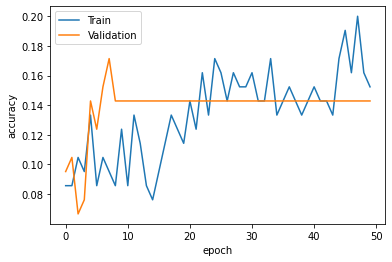

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

kết quả dự đoán:  banhmi


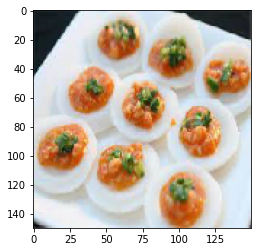

In [17]:
img = load_img('/content/10.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Pho',
 'banhbeo',
 'banhcuon',
 'banhmi',
 'banhtrangtron',
 'banhxeo',
 'buncha',
 'bunrieucua',
 'comsuon',
 'goicuon']
print('kết quả dự đoán: ',Label[int(np.argmax(model.predict(img),axis=-1))])

kết quả dự đoán:  banhbeo


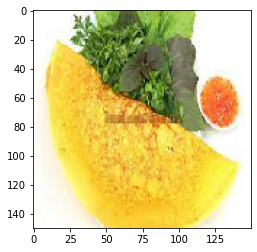

In [18]:
img = load_img('/content/3.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Pho',
 'banhbeo',
 'banhcuon',
 'banhmi',
 'banhtrangtron',
 'banhxeo',
 'buncha',
 'bunrieucua',
 'comsuon',
 'goicuon']
print('kết quả dự đoán: ',Label[int(np.argmax(model.predict(img),axis=-1))])
